In [19]:
import requests
import json
import pandas as pd
from pandas import concat
from pandas import merge
from pandas import DataFrame
from matplotlib import pyplot as plt
import numpy as np

r = requests.get('http://itpaper.co.kr/demo/covid19/all.php')

r.encoding = 'utf -8'
코로나현황dict = json.loads(r.text)
코로나현황dict

코로나현황df = DataFrame()
for i in 코로나현황dict['data']:
    tmp_df = DataFrame(코로나현황dict['data'][i]).reset_index()
    tmp_df['region'] = i
    코로나현황df = concat([코로나현황df, tmp_df])
    
week_released = pd.pivot_table(코로나현황df,index = 'date',columns = 'region',values = 'released').tail(7)
week_released

week_released_acc = pd.pivot_table(코로나현황df,index = 'date',columns = 'region',values = 'released_acc').tail(7)
week_released_acc

region,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
20210516,2677,33994,4079,4115,2442,9177,1750,5022,37721,370,1994,5679,1047,1917,729,3031,2586
20210517,2706,34108,4103,4121,2443,9178,1758,5046,37834,375,2019,5686,1065,1919,738,3042,2587
20210518,2718,34233,4134,4136,2453,9194,1771,5059,37960,375,2061,5706,1075,1930,744,3048,2598
20210519,2740,34379,4166,4173,2463,9203,1779,5088,38119,378,2110,5725,1097,1943,765,3061,2612
20210520,2741,34513,4182,4188,2468,9207,1785,5101,38270,385,2139,5731,1108,1952,770,3066,2617
20210521,2771,34631,4212,4208,2489,9217,1791,5120,38413,385,2168,5742,1116,1966,793,3079,2619
20210522,2790,34805,4234,4215,2512,9221,1803,5135,38863,386,2212,5763,1133,1974,812,3104,2632


In [26]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

daily_release = DataFrame(week_released.sum(axis = 1), columns=['격리해제자'])
daily_release

daily_release_acc = DataFrame(week_released_acc.sum(axis = 1), columns=['누적격리해제자'])
list(daily_release_acc['누적격리해제자'])

[118330, 118728, 119195, 119801, 120223, 120720, 121594]

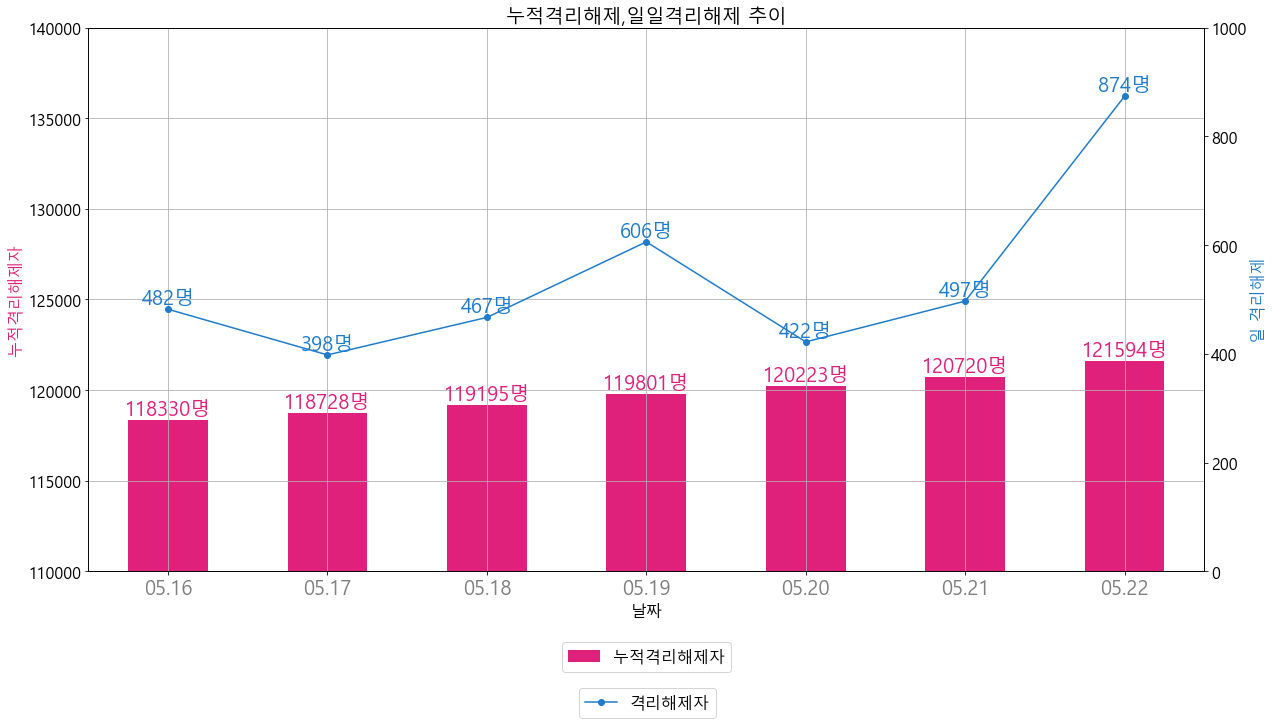

In [83]:
fig, ax1 = plt.subplots(1,1)

xpos = np.arange(len(daily_release_acc.index))
xlabels = []

for i in daily_release_acc.index:
    xlabels.append(i[4:6] + '.' + i[6:])

# ax1에 겹쳐지는 서브플롯 생성
ax2 = ax1.twinx()

daily_release_acc.plot.bar(ax = ax1,rot = 0, color = '#E0217B')
ax1.title.set_text('누적격리해제,일일격리해제 추이')
ax1.set_xlabel('날짜')
ax1.set_ylabel('누적격리해제자', color='#E0217B')
ax1.set_ylim([110000,140000])
ax1.set_xticks(xpos)
ax1.set_xticklabels(xlabels, fontsize = 20, color = 'gray')
ax1.legend( bbox_to_anchor=(0.5,-0.2))
ax1.grid()

for i,v in enumerate(list(daily_release_acc['누적격리해제자'])):
    txt = '%d명' %v
    ax1.text(i, v, txt, fontsize=20, color='#E0217B',
            horizontalalignment='center', verticalalignment='bottom')
    
daily_release.plot(ax = ax2, color = '#1F7CCB', marker ='o')
ax2.set_ylabel('일 격리해제', color = '#1F7CCB')
ax2.set_ylim([0,1000])
ax2.set_xticks(xpos)
ax2.set_xticklabels(xlabels, fontsize = 20, color = 'gray')
ax2.legend( bbox_to_anchor=(0.57,-0.2))

for x, y in enumerate( list(daily_release['격리해제자']) ):
    txt = "%d명" %y
    ax2.text(x, y, txt, fontsize=20, color="#1F7CCB", 
                    horizontalalignment='center', verticalalignment='bottom')
    




    